# Sentimental Analysis using the Natural Language Processing

* Importing the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

 
# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Wordcloud
from wordcloud import wordcloud


nltk.download('stopwords')
nltk.download('wordnet')

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scikit-plot
from scikitplot.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* Importing the Dataset

In [5]:
df_train=pd.read_csv("./emotions/train.txt",delimiter=";",names=['text','label'])
df_val=pd.read_csv("./emotions/val.txt",delimiter=";",names=['text','label'])

In [6]:
df_train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [8]:
df_train.shape

(16000, 2)

In [9]:
df_val.shape

(2000, 2)

* Combining the test & val df's 

In [10]:
df=pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [11]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [12]:
df.shape

(18000, 2)

* All the Categories of Emotion present in the Data


In [13]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

* Strength of the Emotions


In [14]:
df.label.value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

* Plotting the Strength of the emotions

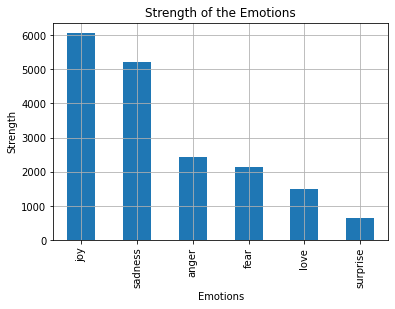

In [15]:
plt.xlabel("Emotions")
plt.ylabel("Strength")
plt.title("Strength of the Emotions")
df.label.value_counts().plot.bar()
plt.grid()

Positive Sentiments - Joy, Love, Surprise - 1

Negative Sentiments - Anger, Sadness, Fear - 0

In [16]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


* Replacing the Emotions with the Binaries

In [17]:
df.label.replace(to_replace=["joy", "love", "surprise"],value=1,inplace=True)
df.label.replace(to_replace=["anger", "sadness", "fear"],value=0,inplace=True)

In [18]:
df.label.value_counts()

0    9799
1    8201
Name: label, dtype: int64

In [19]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


<AxesSubplot:title={'center':'Strength of the Emotions'}, xlabel='Emotions', ylabel='Strength'>

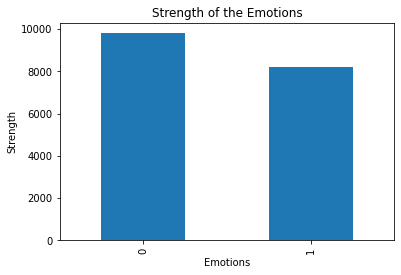

In [20]:
plt.xlabel("Emotions")
plt.ylabel("Strength")
plt.title("Strength of the Emotions")
df.label.value_counts().plot.bar()

* Lementization

In [21]:
lm=WordNetLemmatizer()

In [27]:
def transformation(df_column):
    output=[]
    for i in df_column:
        new_text=re.sub("[^a-zA-Z]"," ",str(i))
        new_text=new_text.lower()
        new_text=new_text.split()
        new_text=[lm.lemmatize(j) for j in new_text if j not in set(stopwords.words("english"))]
        output.append(' '.join(str(k) for k in new_text))
    return output
        
                  

* Downloading the missing packages

In [36]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...


True

In [37]:
var=transformation(df.text)